<a href="https://colab.research.google.com/github/SimplyDifficult/ML-for-Wireless/blob/main/25.%20PI_P%3D20_20_dim_user_case_BOGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
P_max = 20 #in dBm

In [2]:
var = 20
number_of_cells = 4

In [3]:
!sudo add-apt-repository ppa:octave/stable
!sudo apt update
!sudo apt install octave

 The latest version of GNU Octave built for all supported Ubuntu releases. GNU Octave is normally distributed with Ubuntu, this PPA is for you if you have a need to use a newer version of Octave than what you can already get from your installed version of Ubuntu.

Simply follow the instructions below to add this PPA to your system and install the octave package. If it's not that easy or you encounter any errors, contact the team and let us know.

Much credit goes to the Debian Octave Group who maintain the official Debian packages that this work is derived from. Without their efforts to bring Octave packaging to such a high level of quality in Debian and Debian derivatives, this PPA would not be here.
 More info: https://launchpad.net/~octave/+archive/ubuntu/stable
Press [ENTER] to continue or Ctrl-c to cancel adding it.

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:

In [4]:
!wget https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
!wget https://www.dropbox.com/s/d1ytzzfpxsrpbcv/main_bitchanged.m -O /content/main.m
!wget https://www.dropbox.com/s/v3y2xe56qodthnm/function_SE.m
!wget https://www.dropbox.com/s/5p0j4qdqist7ibm/main_individual_transmit_case_for_Test_phase_bitchanged.m -O /content/main_individual_transmit_case_for_Test_phase.m

--2021-10-31 09:39:16--  https://www.dropbox.com/s/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m [following]
--2021-10-31 09:39:16--  https://www.dropbox.com/s/raw/llve9s3hfamwyni/function_uncorrelated_rayleigh_fading_channel_model.m
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd1e1c4afeeae428e340e35f7f.dl.dropboxusercontent.com/cd/0/inline/BZEYFjkDJnSGfFPPh6vs-GC-bRemKDE0p-i9hX2fllfggpCIHBHQSrCzS8MN3I4rSQQVyHihxR1FmXmLv7C1oo9wgP8BGpK83_bD7NJfcKU5zNh2qa9t_lhKKY2aVbxCvUZOgP84t7pXD-egDMs2KQNz/file# [following]
--2021-10-31 09:39:16--  https://ucfd1e1c4afeeae428e340e35f7f.dl.dr

In [5]:
!wget https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
!wget https://www.dropbox.com/s/52gyqiq137mo2bb/SE.mat

--2021-10-31 09:39:19--  https://www.dropbox.com/s/utf73kdk09gjvsu/RR.mat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/utf73kdk09gjvsu/RR.mat [following]
--2021-10-31 09:39:19--  https://www.dropbox.com/s/raw/utf73kdk09gjvsu/RR.mat
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce49b5f8a6280c04685a5b90990.dl.dropboxusercontent.com/cd/0/inline/BZGwA1SYRMbEU40yFR9xf5nsXbCGfTwuHUKM2UyYFDfMuFePutwCLiqqkcY0_RVDewqSAxbWWkY0T_thOL_XC6QZ7ESpXS_ARoea8krfHgZjD-UvHa-4inKrdCH5R5RiwWKeAJ6ntL7aWIhrTDyTDaB2/file# [following]
--2021-10-31 09:39:20--  https://uce49b5f8a6280c04685a5b90990.dl.dropboxusercontent.com/cd/0/inline/BZGwA1SYRMbEU40yFR9xf5nsXbCGfTwuHUKM2UyYFDfMuFePutwCLiqqkcY0_RVDewqSAxbWWkY0T_thOL_XC6QZ7ESpXS_ARoea8krfHgZj

In [3]:
from numpy import arange
from numpy import vstack
from numpy import argmax
from numpy import asarray
from numpy.random import normal
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from warnings import catch_warnings
from warnings import simplefilter
from matplotlib import pyplot
from scipy.optimize import minimize
import numpy as np
from scipy.io import loadmat, savemat
import numpy as np
from google.colab import files
import cv2
from scipy.optimize import dual_annealing

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
#### Objective function
import random
def objective(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W main.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [9]:
#surrogate or approximation for the objective function
def surrogate(model, X):
	#catch any warning generated when making a prediction
	with catch_warnings():
		#ignore generated warnings
		simplefilter("ignore")
		return model.predict(X, return_std=True)

In [11]:
def PIacquisition(Xsamples, X, model):
  Xsamples = Xsamples[np.newaxis,:]
  yhat, _ = surrogate(model, X)
  best = max(yhat)
  mu, std = surrogate(model, Xsamples)
  mu = mu[:, 0]
  probs = norm.cdf((mu - best) / (std+1E-30))
  return -probs[0]

In [10]:
#optimize the acquisition function
def opt_acquisition(X, y, model):
  #Do it 5 times
  r_min, r_max = -31.0, P_max  
  bounds = []
  for ti in range(var):
    bounds = bounds + [[r_min, r_max]]
  min_result = 9999999999999.0
  min_answer = 0
  
  for i in range(1):
    result = dual_annealing(PIacquisition, bounds, args=(X,model))
    if(result.fun<min_result):
      min_result = result.fun
      min_answer = result['x']    
  return min_answer

In [12]:
import random
def objective_FPA(tr_array):
  tr_in_mW = np.power(10,tr_array/10.0)
  savemat("transmit.mat", {"transmit":(tr_in_mW)})
  !octave -W /content/main_individual_transmit_case_for_Test_phase.m
  SE = loadmat('SE.mat')
  return np.sum(SE["SE"])

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
X = np.load("/content/drive/MyDrive/trainingx_BOGP_PI_P=20.npy")
y = np.load("/content/drive/MyDrive/trainingy_BOGP_PI_P=20.npy")
y_FPA = np.load("/content/drive/MyDrive/grad_trainingyFPA_BOGP_PI_P=20.npy")

x_next is [ 17.07681759 -30.99427719 -30.99689582  11.23083595  19.99988381
  19.9999934   19.99999222  11.98226642  19.99323161  10.05753268
  19.99772929 -30.99424243  19.99900846  19.50295319  19.99639478
  15.95075217  19.66912791  18.84600317  10.20263324  19.99999423]
f()=59.083069, actual=59.016
0


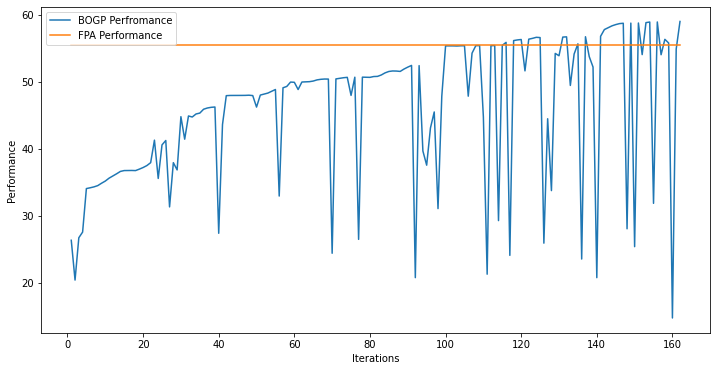

x_next is [ 19.99986523  19.99989588 -30.99985854  14.28210579  19.99964271
  19.99984996  19.99999683  19.99965103 -30.99998108  -0.28153483
  19.99992254 -30.9998781   19.99969472 -17.90649332  19.99994822
  19.99975883  19.99994192  19.99999656   6.09690226  19.99988563]
f()=53.495613, actual=56.322
1


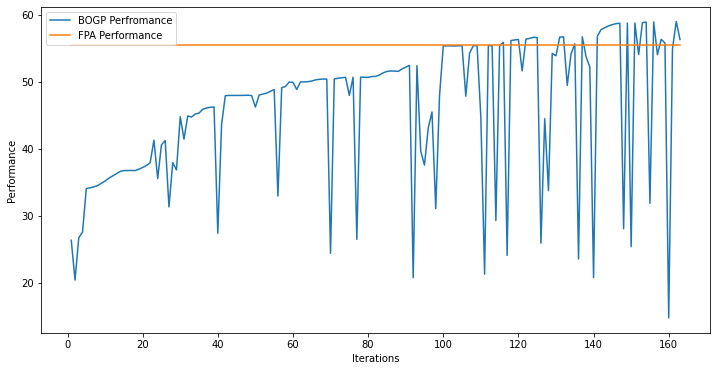

x_next is [ -3.10380093  -3.17583814   8.98836952 -20.56853071  -1.49735564
 -14.37553918 -15.71269343 -16.5575274    7.66875914  -7.84731827
 -24.48486897 -20.29074253 -27.87344985 -15.6769735  -27.25927463
  -3.69963451 -29.47341471   3.53745184  -5.54530808   2.90406303]
f()=45.966035, actual=14.059
2


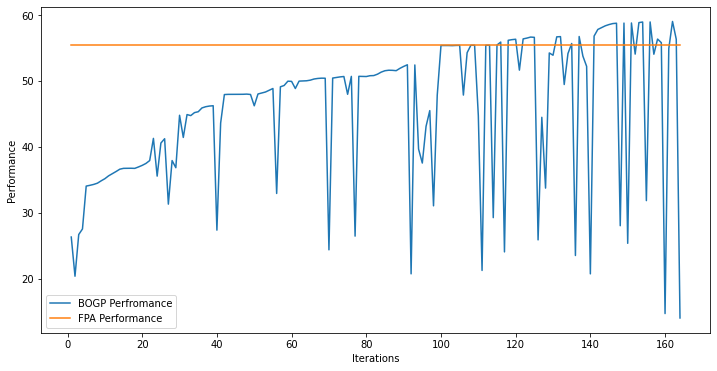

x_next is [ 19.99992832  19.99997023 -30.99917582  19.99997301  19.99964791
  19.9999072   19.99994576  19.99970616 -30.99978019  18.87500553
  19.99996763  19.99986646  19.999989   -14.59465734  19.99980628
  19.99994452  19.99991138  19.99985303 -19.69681264  19.99977816]
f()=54.226663, actual=51.377
3


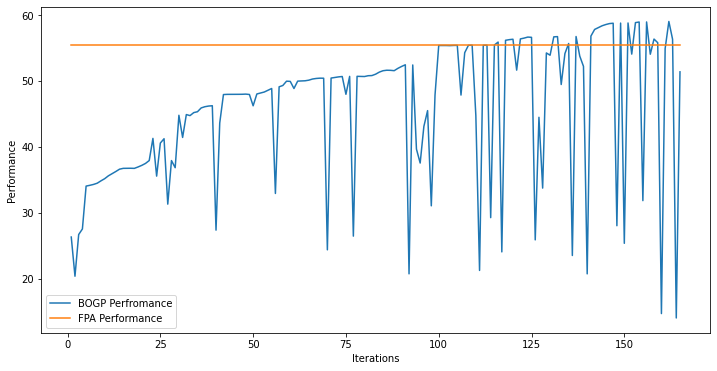

x_next is [-20.27148512 -22.4139098  -21.18767249 -27.80185793   7.79724683
  -5.03752375  -6.57696655  10.32247199  -3.81556031  12.19776429
 -22.05977133  17.30972846   3.49923786 -11.98458317 -24.27041695
 -18.58355194 -10.18223064 -16.114357   -14.41193998  13.06780593]
f()=45.804736, actual=22.539
4


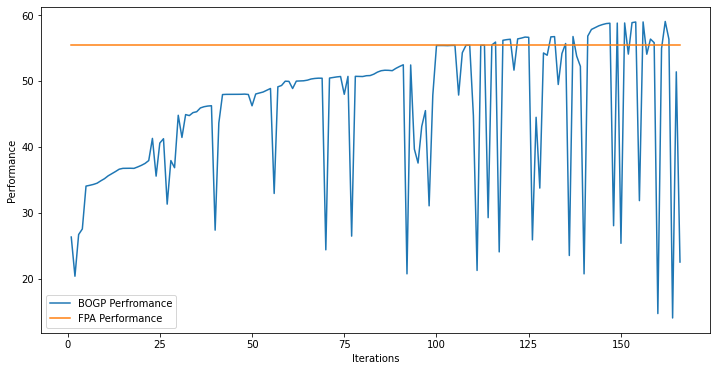

x_next is [ 19.08009649 -10.43396067 -18.3307814   18.75258555  18.57846803
 -28.98419208  -9.60636123  -3.72678979 -21.62518086 -22.78558194
 -25.59464664 -13.90762557   2.35471707 -13.27455415   2.11191648
 -14.4858204  -27.50879993   0.19558968 -21.25088943  18.97234511]
f()=25.194370, actual=22.165
5


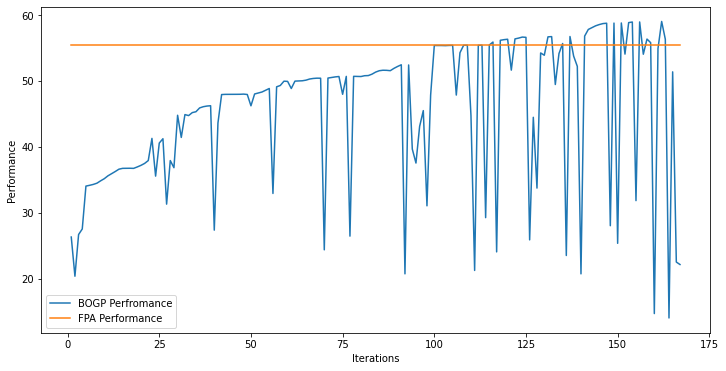

x_next is [ 19.99990709  19.99993904 -30.99972105  17.66422921  19.99984891
  19.99986871  19.99997305  19.99977449   5.27680771  -7.46531499
  19.99985239 -30.99990581  19.99989557 -26.72673937  19.99972623
  19.99948869  19.99976624  19.99994812  19.99962091  19.99996629]
f()=55.374875, actual=53.362
6


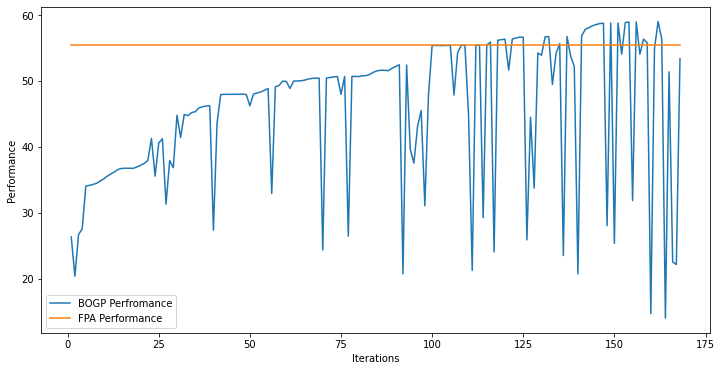

x_next is [ 19.99977873  19.99997245 -30.99993536  -1.15753256  19.99999021
  19.9999556   19.99995963  19.99990821 -30.99991898   6.93076182
  19.99986875 -30.99938037  19.999452     5.57606337  19.99973409
   3.58061296  19.99983802  19.99971725  19.99947568  19.99989238]
f()=55.557008, actual=53.447
7


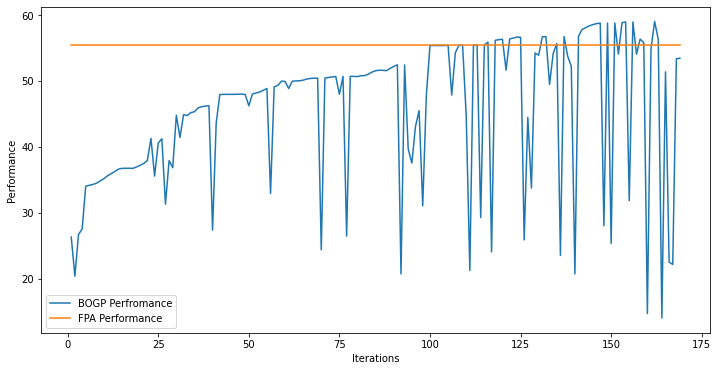

x_next is [ 19.99954565  19.99991219 -30.99966256  19.99929131  19.99988086
  19.99987119  19.99960138  19.99984838 -30.9999796   -1.18633495
  19.99967614  -0.87042169  19.99994035 -28.18030495 -23.90982729
  19.99987906  19.99907043  19.99979948  19.99981004  19.99999337]
f()=54.343822, actual=52.598
8


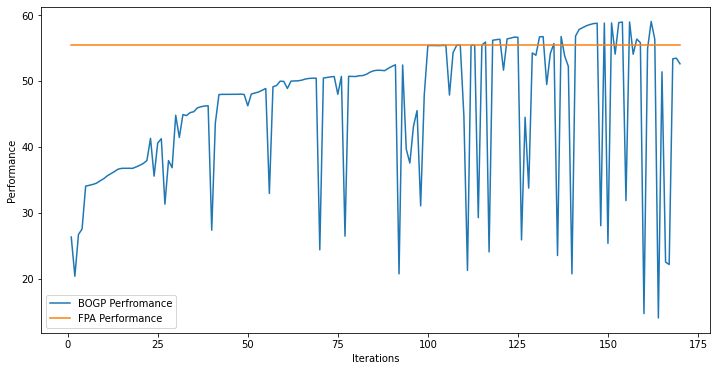

x_next is [ 19.9999711   19.99944412 -30.99971445  19.99934822  19.99955995
  19.99984178  19.99996398  19.99987259  19.99965324   0.22677092
  19.99980305  19.99977815  19.99997833  19.99998387  19.99986135
  19.99981187  19.99994153 -30.99940041  19.9998684   19.99977222]
f()=51.952180, actual=53.451
9


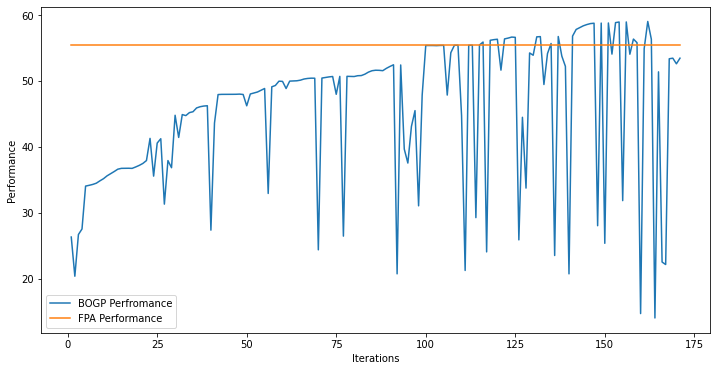

x_next is [ 19.99992698  19.99985417 -30.99956422  19.99997621  19.99967939
  19.99997064  19.99987191 -12.88779084 -30.99982182  19.99994326
  19.99996189 -30.99944305  19.99997513 -30.99959187  19.99994177
  19.99997555  19.99985373  19.99970694  19.55372887  19.99962372]
f()=54.023473, actual=52.427
10


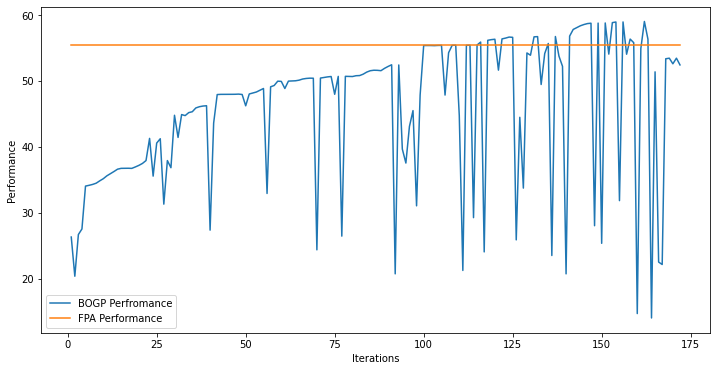

x_next is [ 19.99988233  19.99995938 -30.99997187  19.99998755  19.99992781
  19.99987267  19.99979496 -30.99951214  19.99998545  19.76533442
  19.99992072  19.9996957   19.99978787  19.99963137  19.99995259
  19.99998203  19.99998951  19.99982288  19.99999589  19.99993347]
f()=52.355310, actual=54.030
11


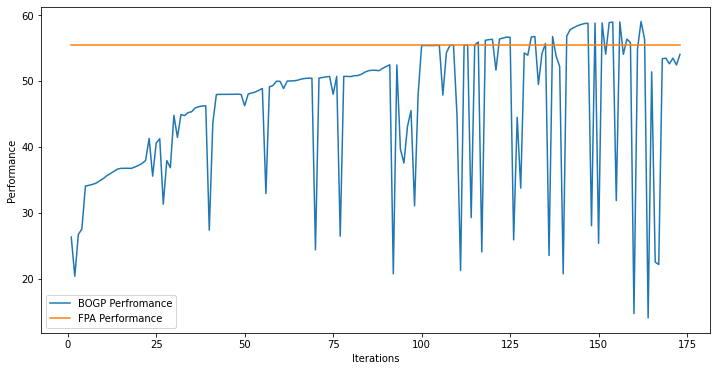

x_next is [-10.8369197    8.03174842 -24.3410756   -1.6680961  -28.3639943
 -23.84486515 -28.2926132  -15.51302484 -27.90506946  17.81173031
 -16.92792477 -28.52396326   5.62946255 -27.32260363 -18.70367324
 -28.47065072  -7.90382901 -22.26535446 -17.20558885   1.23517945]
f()=45.790359, actual=15.572
12


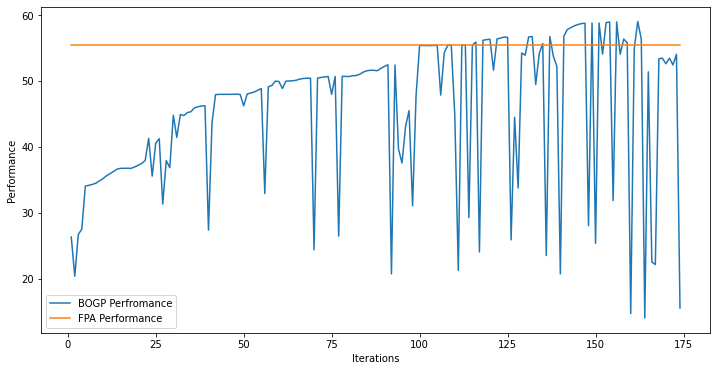

x_next is [ 19.99999844  19.99996957 -30.99994572  19.99993122  19.99992934
  19.99970124  19.99999556  19.99987622 -30.99945472  -6.17586168
  19.99999211 -30.99942312  19.99970613   3.75036792  19.99988227
  19.99987745  19.99985787 -18.01250112  13.40013818  19.9997774 ]
f()=53.743662, actual=50.908
13


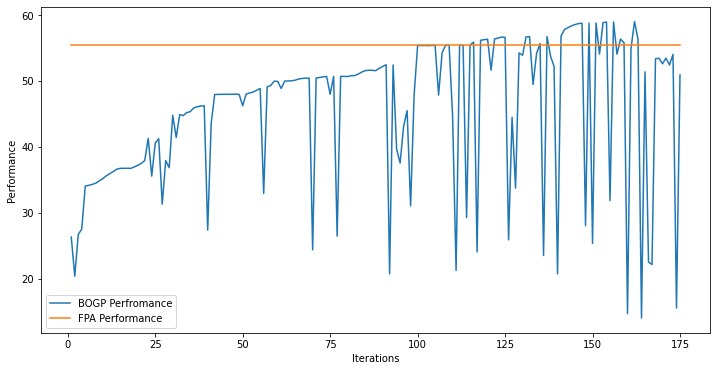

x_next is [ 19.965212   -30.88363004 -30.96793725  19.98761038  19.87699443
  19.9730088   19.94458138  19.80422838  19.81316008  19.97522561
  19.99669376 -30.85095422  19.99967576  19.93066169  19.98927512
  19.99057913  19.99360509  19.96733452  19.99038012  19.83488736]
f()=45.646373, actual=53.986
14


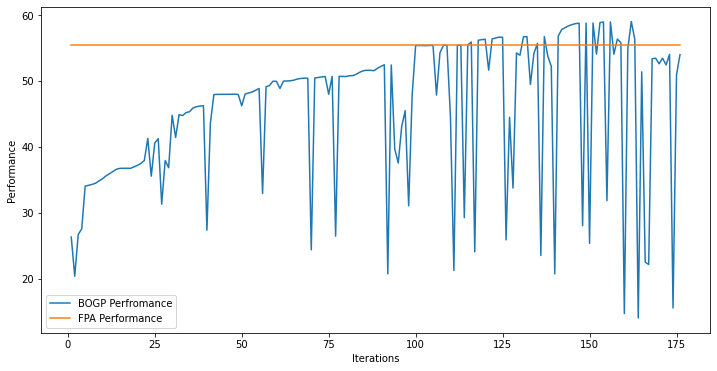

x_next is [ 19.99986428  19.99990225  19.9996277   19.9998635   19.99992639
  19.9998326   19.99982403  19.99976585 -30.99996564   8.68402903
  19.99968576  19.9998179   19.99997368 -30.99990828  19.9999062
  19.99999002  19.9998319   19.99993635  19.99988983  19.99969396]
f()=52.616747, actual=56.351
15


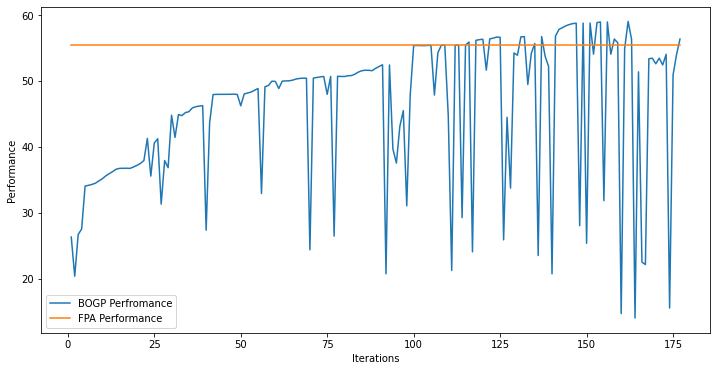

x_next is [ 16.83527847 -30.99991027 -30.99974217  11.54530309  19.9999999
  19.99999999  19.99999931  13.23470786  19.99999944  10.31761582
  19.99999908 -30.99994126  19.99999922  19.55091538  19.99999999
  13.50298699  19.99996027  17.91529038   9.75953153  19.9999998 ]
f()=59.520973, actual=58.915
16


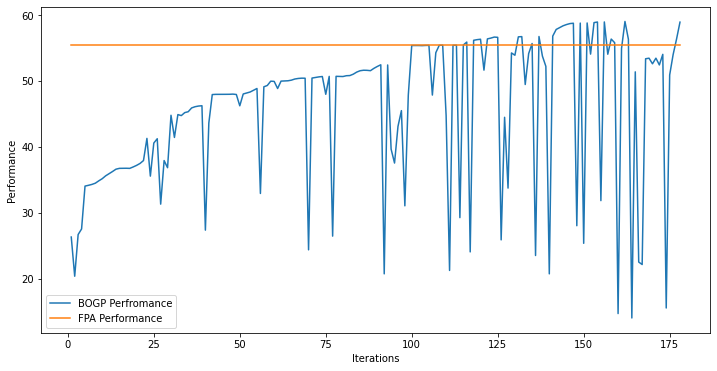

x_next is [ 19.99988713  19.99951448 -30.9999071   19.99950307  19.99972899
  19.9998234   19.99971345  19.99933499  19.99976772 -15.26658989
  19.99942181  19.99968167  19.99991824  19.99985082  19.99995725
  19.99973654 -30.99969908  19.99992167  19.99937711  19.99981399]
f()=53.948694, actual=52.663
17


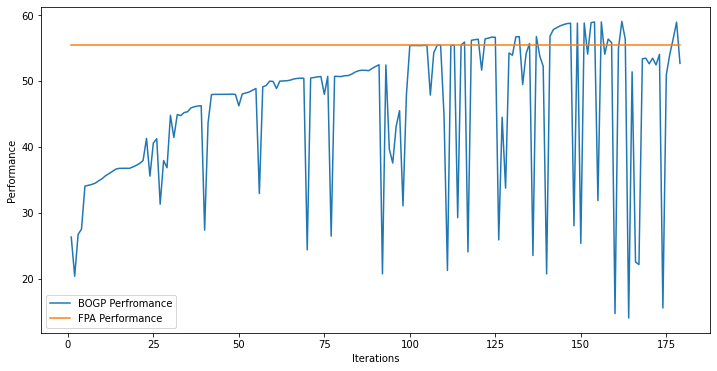

x_next is [ 19.99991489  19.99997339  19.99985383  19.99964712  19.99979523
  19.9996385   19.99978723  19.99901175 -30.9993831   16.15386758
  19.99994714  19.99978208  19.99982314  17.67545592  19.99967078
  19.99973532  19.99999968  19.9997593   19.99983743  19.9998942 ]
f()=54.366653, actual=56.770
18


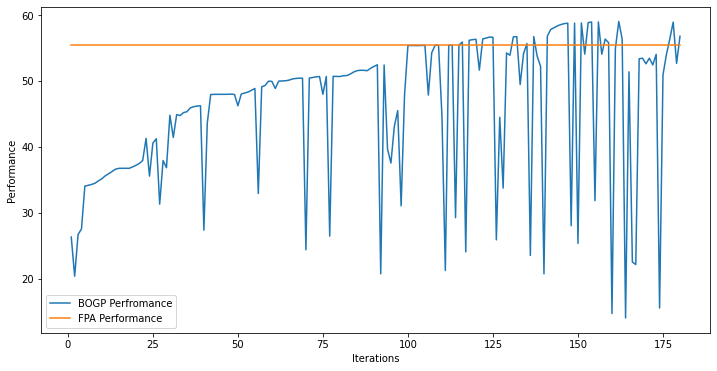

x_next is [ -5.07386939  16.14513711 -24.13944601 -27.88403208  19.44479758
 -11.4977311   15.19293039 -19.54059841   6.52183776 -10.316661
  14.82879018 -13.84478341   3.55085976 -15.93944009  13.33969418
  13.80811031 -28.80525391 -29.63112337  18.03463278  17.64411974]
f()=33.464673, actual=28.697
19


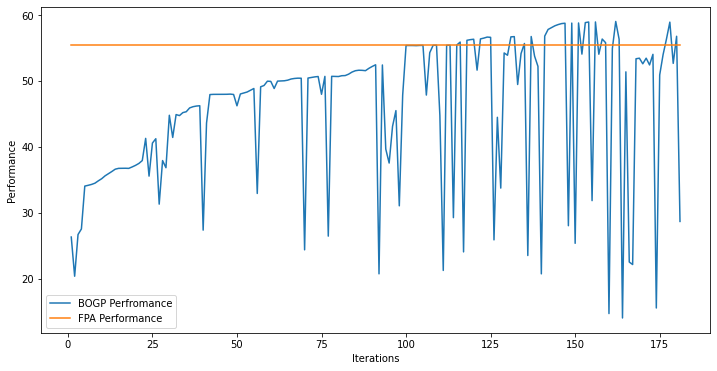

In [15]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernels =  ConstantKernel(constant_value=200, constant_value_bounds = (1e-20, 1e20)) * Matern(length_scale=1, length_scale_bounds=(1e-20,1e20), nu=1.5) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-20, 1e20)) 
model = GaussianProcessRegressor(kernel = kernels, n_restarts_optimizer=30)

model.fit(X, y)

for i in range(20):
  x_next = opt_acquisition(X, y, model)

  np.save("/content/drive/MyDrive/trainingx_BOGP_PI_P=20.npy",X)
  np.save("/content/drive/MyDrive/trainingy_BOGP_PI_P=20.npy",y)
  np.save("/content/drive/MyDrive/grad_trainingyFPA_BOGP_PI_P=20.npy",y_FPA)
  
  tr = 0
  for l in range(1):
    tr = tr + objective_FPA(x_next.reshape((int)(var/number_of_cells), number_of_cells))
  tr = tr/1.0  
  actual = tr

  tr_FPA = objective_FPA(P_max * np.ones([1,var], dtype = "float").reshape((int)(var/number_of_cells), number_of_cells))
  
  est, _ = surrogate(model, [x_next])
  print("x_next is", x_next)
  print('f()=%3f, actual=%.3f' % (est, actual))
  
  X = vstack((X, [x_next]))
  y = vstack((y, [[actual]]))
  y_FPA = vstack((y_FPA, [[tr_FPA]]))
  
  model.fit(X, y)

  print(i)
  pyplot.figure(figsize = (12, 6))

  pyplot.xlabel("Iterations")
  pyplot.ylabel("Performance")
  pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
  pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
  pyplot.legend(["BOGP Perfromance","FPA Performance"])
  pyplot.show()


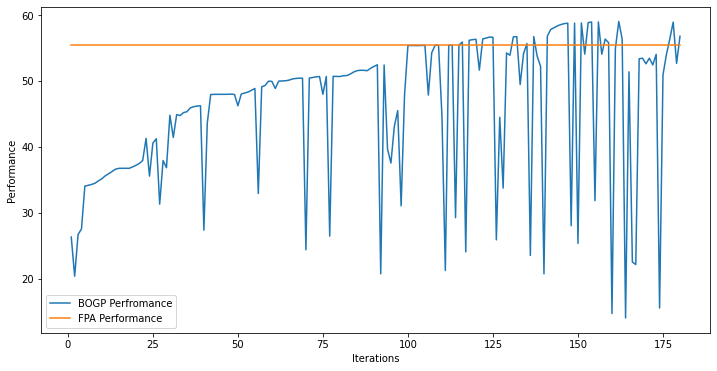

P_max = 20.000, Optimal_SE = 59.016
P_max = 20.000, Optimal_SE_FPA = 55.514


In [6]:
pyplot.figure(figsize = (12, 6))   
pyplot.xlabel("Iterations")
pyplot.ylabel("Performance")
pyplot.plot(np.arange(1,X.shape[0]+1),y[:])
pyplot.plot(np.arange(1,X.shape[0]+1), y_FPA[:])
pyplot.legend(["BOGP Perfromance","FPA Performance"])
pyplot.show() 
ix = 0
ix = argmax(y)
print('P_max = %.3f, Optimal_SE = %.3f' % (P_max, y[ix]))

ix_FPA=0
ix_FPA=argmax(y_FPA)
print('P_max = %.3f, Optimal_SE_FPA = %.3f' % (P_max, y_FPA[ix_FPA]))

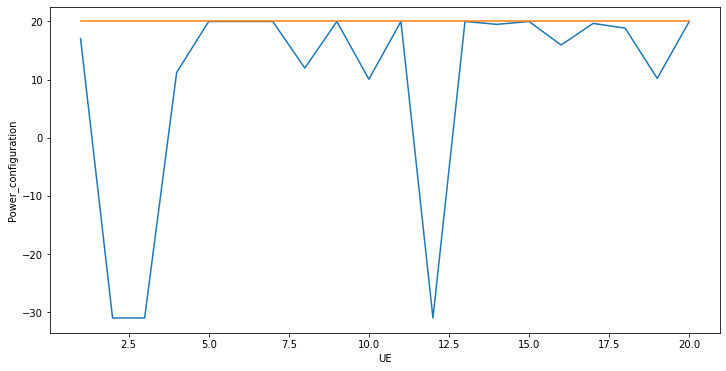

Power_configuration_BOGP is [ 17.07681759 -30.99427719 -30.99689582  11.23083595  19.99988381
  19.9999934   19.99999222  11.98226642  19.99323161  10.05753268
  19.99772929 -30.99424243  19.99900846  19.50295319  19.99639478
  15.95075217  19.66912791  18.84600317  10.20263324  19.99999423]


In [7]:
X_FPA = P_max * np.ones([1,var], dtype = "float").reshape((int)(20), 1)
pyplot.figure(figsize = (12, 6)) 
pyplot.xlabel("UE")
pyplot.ylabel("Power_configuration")
pyplot.plot(np.arange(1,21),X[ix][:])
pyplot.plot(np.arange(1,21),X_FPA[:])
pyplot.show()
print("Power_configuration_BOGP is", X[ix])

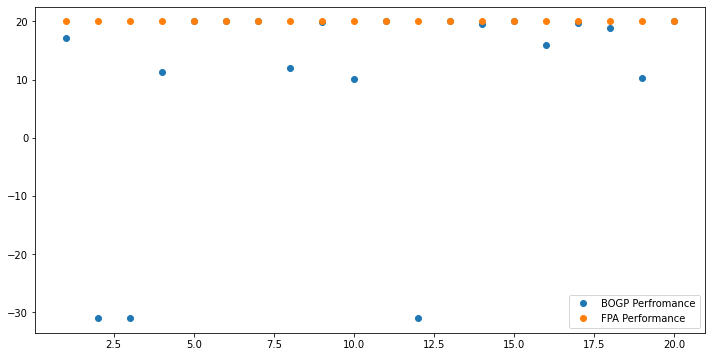

Power_configuration_BOGP is [ 17.07681759 -30.99427719 -30.99689582  11.23083595  19.99988381
  19.9999934   19.99999222  11.98226642  19.99323161  10.05753268
  19.99772929 -30.99424243  19.99900846  19.50295319  19.99639478
  15.95075217  19.66912791  18.84600317  10.20263324  19.99999423]


In [8]:
import matplotlib.pyplot as plt
X_FPA=np.linspace(P_max,P_max,20)
plt.figure(figsize = (12, 6)) 
plt.plot(np.arange(1,21),X[ix][:], 'o')
plt.plot(np.arange(1,21),X_FPA[:], 'o')
plt.legend(["BOGP Perfromance","FPA Performance"])
plt.show()
print("Power_configuration_BOGP is", X[ix])